# Starbucks Capstone Challenge

### Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks. 

Not all users receive the same offer, and that is the challenge to solve with this data set.

Your task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type. This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

You'll be given transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer. 

Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.

### Example

To give an example, a user could receive a discount offer buy 10 dollars get 2 off on Monday. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer.

However, there are a few things to watch out for in this data set. Customers do not opt into the offers that they receive; in other words, a user can receive an offer, never actually view the offer, and still complete the offer. For example, a user might receive the "buy 10 dollars get 2 dollars off offer", but the user never opens the offer during the 10 day validity period. The customer spends 15 dollars during those ten days. There will be an offer completion record in the data set; however, the customer was not influenced by the offer because the customer never viewed the offer.

### Cleaning

This makes data cleaning especially important and tricky.

You'll also want to take into account that some demographic groups will make purchases even if they don't receive an offer. From a business perspective, if a customer is going to make a 10 dollar purchase without an offer anyway, you wouldn't want to send a buy 10 dollars get 2 dollars off offer. You'll want to try to assess what a certain demographic group will buy when not receiving any offers.

### Final Advice

Because this is a capstone project, you are free to analyze the data any way you see fit. For example, you could build a machine learning model that predicts how much someone will spend based on demographics and offer type. Or you could build a model that predicts whether or not someone will respond to an offer. Or, you don't need to build a machine learning model at all. You could develop a set of heuristics that determine what offer you should send to each customer (i.e., 75 percent of women customers who were 35 years old responded to offer A vs 40 percent from the same demographic to offer B, so send offer A).

# Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record


# Install packages and import libraries

Uncomment and run the following cell to install necessary packages

In [519]:
# TODO: Make a requirements.txt and provide installation instructions
# %conda install seaborn
# %conda update pandas
# %conda install -c conda-forge scikit-learn

In [520]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
import sklearn

%matplotlib inline

# Data Preview

Read in our transformed dataset <b>inputs_pre.csv</b> from [Data Preview and Transform](http://localhost:8888/notebooks/Desktop/Data/udacity-ml-capstone/Data%20Preview%20and%20Transform.ipynb).

In [521]:
inputs_pre = pd.read_csv("data/inputs_pre.csv")
inputs_pre

,start_time,end_time,offer_id,person,amount,reward,gender,age,became_member_on,income
0,0.0,192.0,no_offer,0009655768c64bdeb2e877511632db8f,0.00,NaN,M,33,20170421,72000.0
1,192.0,240.0,5a8bc65990b245e5a138643cd4eb9837,0009655768c64bdeb2e877511632db8f,22.16,0.0,M,33,20170421,72000.0
2,240.0,372.0,no_offer,0009655768c64bdeb2e877511632db8f,0.00,NaN,M,33,20170421,72000.0
3,372.0,432.0,3f207df678b143eea3cee63160fa8bed,0009655768c64bdeb2e877511632db8f,8.57,0.0,M,33,20170421,72000.0
4,432.0,714.0,no_offer,0009655768c64bdeb2e877511632db8f,96.87,NaN,M,33,20170421,72000.0
...,...,...,...,...,...,...,...,...,...,...
109823,198.0,354.0,no_offer,ffff82501cea40309d5fdd7edcca4a07,96.37,NaN,F,45,20161125,62000.0
109824,354.0,384.0,2906b810c7d4411798c6938adc9daaa5,ffff82501cea40309d5fdd7edcca4a07,15.57,2.0,F,45,20161125,62000.0
109825,384.0,414.0,no_offer,ffff82501cea40309d5fdd7edcca4a07,33.12,NaN,F,45,20161125,62000.0
109826,414.0,414.0,2906b810c7d4411798c6938adc9daaa5,ffff82501cea40309d5fdd7edcca4a07,17.55,2.0,F,45,20161125,62000.0


Read in the JSON files.

In [522]:
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

Ready the <b>transcript</b> data for preprocessing use, using the same steps as those in [Data Exploration](http://localhost:8888/notebooks/Desktop/Data/udacity-ml-capstone/Data%20Exploration.ipynb).

In [523]:
transcript["offer_id"] = transcript["value"].apply(lambda x: x.get("offer id", x.get("offer_id", np.nan)))
transcript["amount"] = transcript["value"].apply(lambda x: x.get("amount", np.nan))
transcript["reward"] = transcript["value"].apply(lambda x: x.get("reward", np.nan))
transcript.drop(columns="value", inplace=True)
transcript.head()
transcript

,person,event,time,offer_id,amount,reward
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,NaN
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,NaN
2,e2127556f4f64592b11af22de27a7932,offer received,0,2906b810c7d4411798c6938adc9daaa5,NaN,NaN
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,fafdcd668e3743c1bb461111dcafc2a4,NaN,NaN
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,NaN
...,...,...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,714,NaN,1.59,NaN
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,714,NaN,9.53,NaN
306531,a00058cf10334a308c68e7631c529907,transaction,714,NaN,3.61,NaN
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,714,NaN,3.53,NaN


# Data Cleaning
During Data Exploration, we have came across some flaws in our data, such as missing data, outliers, etc. In this section, we seek to tackle these issues to obtain clean data before training our models. We try to do these while wrapping the steps taken into a pipeline that can be compactly reused to retrain our models or to transform incoming data into inputs that fit our model.

# Feature Engineering
We wrap up all feature engineering discussed in [Data Exploration](http://localhost:8888/notebooks/Desktop/Data/udacity-ml-capstone/Data%20Exploration.ipynb) into a single pipeline.

In [524]:
def calc_membership_len(X):
    X["became_member_on"] = pd.to_datetime(X["became_member_on"], format="%Y%m%d")
    earliest_date = X["became_member_on"].min()
    X["membership_length"] = X["became_member_on"].apply(lambda x: (x - earliest_date).days)
    return X

def calc_norm_membership_len(X):
    # Calculate membership length normalised on age less the minimum age
    X['norm_membership_length'] = (
        (
            X['membership_length'] / 365
        ) / (
            X['age'] - X['age'].min() + 1
        )
    )
    return X

def calc_duration(X):
    # Length of offer period in days
    X["duration"] = (
        X["end_time"] - X["start_time"]
    ) / 24
    X.loc[X.duration == 0, 'duration'] = 1 / 24
    return X

def calc_dep_var(X):
    # Calculate daily average of transaction less reward
    X["avg_transaction_less_reward"] = (
        (X["amount"] - X["reward"].fillna(0)) / X["duration"]
    )
    return X

def calc_time_since_prev_transact(X, transcript=None):
    if transcript is None:
        raise TypeError('missing transcript data argument')
    # For each influence period start time, get from transcript the time the previous transaction took place
    X = pd.merge_asof(
        X.astype({'start_time': 'int64'}).sort_values("start_time"),
        transcript.loc[
            transcript['event'] == 'transaction',
            ["person", "time"]
        ],
        left_on="start_time",
        right_on="time",
        by="person",
        allow_exact_matches=False,
    )
    X['time_since_prev_transact'] = (X['start_time'] - X['time']) / 24
    return X

def calc_view_rate(X, transcript=None):
    if transcript is None:
        raise TypeError('missing transcript data argument')
    # Number of offers viewed to user divided by number of offers sent to the user
    received = transcript[transcript.event == 'offer received'].groupby('person')['event'].count()
    viewed = transcript[transcript.event == 'offer viewed'].groupby('person')['event'].count()
    view_rate = (viewed / received).rename('view_rate').fillna(0)
    X = X.merge(view_rate, on='person')
    return X

def calc_complete_rate(X, transcript=None):
    if transcript is None:
        raise TypeError('missing transcript data argument')
    # Number of offers completed by user divided by number of offers sent to the user
    received = transcript[transcript.event == 'offer received'].groupby('person')['event'].count()
    completed = transcript[transcript.event == 'offer completed'].groupby('person')['event'].count()
    complete_rate = (completed / received).rename('complete_rate').fillna(0)
    X = X.merge(complete_rate, on='person')
    return X

def calc_transact_aggs(X, transcript=None):
    if transcript is None:
        raise TypeError('missing transcript data argument')
    # Calculate each person's mean transaction amount
    t = transcript[transcript.event == 'transaction'].groupby(
        by='person'
    )['amount'].agg([
        'mean', 
        std,
        'min', 
        'max'
    ])
    t['range'] = t['max'] - t['min']
    t.columns = ['transact_' + col for col in t.columns]
    X = X.merge(t, on='person')
    return X

# Workaround for ddof bug
def std(x): return np.std(x)

In [525]:
from feature_engine.imputation import ArbitraryNumberImputer
from feature_engine.outliers import ArbitraryOutlierCapper
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

feat_eng_pipe = Pipeline(steps=[
    ('calculate_membership_length', FunctionTransformer(calc_membership_len)),
    ('calculate_normalised_membership_length', FunctionTransformer(calc_norm_membership_len)),
    ('calculate_duration', FunctionTransformer(calc_duration)),
    ('calculate_dependent_variable', FunctionTransformer(calc_dep_var)),
    ('calculate_time_since_previous_transaction', FunctionTransformer(
        calc_time_since_prev_transact, kw_args={'transcript': transcript}
    )),
    ('calculate_view_rate', FunctionTransformer(
        calc_view_rate, kw_args={'transcript': transcript}
    )),
    ('calculate_complete_rate', FunctionTransformer(
        calc_complete_rate, kw_args={'transcript': transcript}
    )),
    ('calculate_transaction_aggregates', FunctionTransformer(
        calc_transact_aggs, kw_args={'transcript': transcript}
    )),
])

inputs_pre = feat_eng_pipe.fit_transform(inputs_pre)

In [526]:
inputs_pre

,start_time,end_time,offer_id,person,amount,reward,gender,age,became_member_on,income,...,avg_transaction_less_reward,time,time_since_prev_transact,view_rate,complete_rate,transact_mean,transact_std,transact_min,transact_max,transact_range
0,0,192.0,no_offer,0009655768c64bdeb2e877511632db8f,0.00,NaN,M,33,2017-04-21,72000.0,...,0.000000,NaN,NaN,0.8,0.6,15.95,6.148297,8.57,28.16,19.59
1,192,240.0,5a8bc65990b245e5a138643cd4eb9837,0009655768c64bdeb2e877511632db8f,22.16,0.0,M,33,2017-04-21,72000.0,...,11.080000,NaN,NaN,0.8,0.6,15.95,6.148297,8.57,28.16,19.59
2,240,372.0,no_offer,0009655768c64bdeb2e877511632db8f,0.00,NaN,M,33,2017-04-21,72000.0,...,0.000000,228.0,0.50,0.8,0.6,15.95,6.148297,8.57,28.16,19.59
3,372,432.0,3f207df678b143eea3cee63160fa8bed,0009655768c64bdeb2e877511632db8f,8.57,0.0,M,33,2017-04-21,72000.0,...,3.428000,228.0,6.00,0.8,0.6,15.95,6.148297,8.57,28.16,19.59
4,432,714.0,no_offer,0009655768c64bdeb2e877511632db8f,96.87,NaN,M,33,2017-04-21,72000.0,...,8.244255,414.0,0.75,0.8,0.6,15.95,6.148297,8.57,28.16,19.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106959,408,480.0,fafdcd668e3743c1bb461111dcafc2a4,bf6849a39d3640069a65f44f8b01f5da,18.93,2.0,F,66,2018-02-10,32000.0,...,5.643333,360.0,2.00,1.0,0.5,9.31,4.279250,3.30,17.00,13.70
106960,480,528.0,no_offer,bf6849a39d3640069a65f44f8b01f5da,19.97,NaN,F,66,2018-02-10,32000.0,...,9.985000,474.0,0.25,1.0,0.5,9.31,4.279250,3.30,17.00,13.70
106961,528,558.0,f19421c1d4aa40978ebb69ca19b0e20d,bf6849a39d3640069a65f44f8b01f5da,10.15,5.0,F,66,2018-02-10,32000.0,...,4.120000,486.0,1.75,1.0,0.5,9.31,4.279250,3.30,17.00,13.70
106962,558,612.0,no_offer,bf6849a39d3640069a65f44f8b01f5da,10.15,NaN,F,66,2018-02-10,32000.0,...,4.511111,486.0,3.00,1.0,0.5,9.31,4.279250,3.30,17.00,13.70


We create a pipeline that:
1. Drop columns which are irrelevant.
2. Drop the uninsightful 14860 records which has null <i>gender</i> and <i>income</i> and an arbitrary <i>age</i> of 118.

In [527]:
from feature_engine.selection import DropFeatures
from feature_engine.imputation import DropMissingData

COLS_OF_INTEREST = [
    'avg_transaction_less_reward',
    'membership_length',
    'norm_membership_length',
    'age',
    'offer_id',
    'income',
    'gender',
    'time_since_prev_transact',
    'view_rate',
    'complete_rate',
    'transact_mean',
    'transact_std',
    'transact_range'
]

drop_pipe = Pipeline(steps=[
    ('drop_irrelevant_features', DropFeatures(
        list(set(inputs_pre.columns) - set(COLS_OF_INTEREST))
    )),
    ('drop_nulls', DropMissingData(variables=['gender', 'income'])),
])

inputs_pre = drop_pipe.fit_transform(inputs_pre)

In [528]:
inputs_pre

,offer_id,gender,age,income,membership_length,norm_membership_length,avg_transaction_less_reward,time_since_prev_transact,view_rate,complete_rate,transact_mean,transact_std,transact_range
0,no_offer,M,33,72000.0,1362,0.233219,0.000000,NaN,0.8,0.6,15.95,6.148297,19.59
1,5a8bc65990b245e5a138643cd4eb9837,M,33,72000.0,1362,0.233219,11.080000,NaN,0.8,0.6,15.95,6.148297,19.59
2,no_offer,M,33,72000.0,1362,0.233219,0.000000,0.50,0.8,0.6,15.95,6.148297,19.59
3,3f207df678b143eea3cee63160fa8bed,M,33,72000.0,1362,0.233219,3.428000,6.00,0.8,0.6,15.95,6.148297,19.59
4,no_offer,M,33,72000.0,1362,0.233219,8.244255,0.75,0.8,0.6,15.95,6.148297,19.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106959,fafdcd668e3743c1bb461111dcafc2a4,F,66,32000.0,1657,0.092647,5.643333,2.00,1.0,0.5,9.31,4.279250,13.70
106960,no_offer,F,66,32000.0,1657,0.092647,9.985000,0.25,1.0,0.5,9.31,4.279250,13.70
106961,f19421c1d4aa40978ebb69ca19b0e20d,F,66,32000.0,1657,0.092647,4.120000,1.75,1.0,0.5,9.31,4.279250,13.70
106962,no_offer,F,66,32000.0,1657,0.092647,4.511111,3.00,1.0,0.5,9.31,4.279250,13.70


We split our data into train and test sets with a 9:1 ratio.

In [997]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    inputs_pre.drop(columns='avg_transaction_less_reward'),
    inputs_pre[['avg_transaction_less_reward']],
    test_size=0.1,
    random_state=10,
)

INPUT_FEATURES = list(X_train.columns)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(83488, 12) (9277, 12)
(83488, 1) (9277, 1)


We employ the following data cleaning steps to ready our X data for model training:
1. Impute the null <i>time_since_prev_transact</i> with a randomly sampled value. This imputation step can be reused with future transcipt data that spans a longer period.
2. Discretise <i>view_rate</i> and <i>complete_rate</i>, owing to their low cardinality.
3. Perform mean encoding of <i>view_rate</i> and <i>complete_rate</i>.
4. Perform one hot encoding of <i>offer_id</i> and <i>gender</i>. We hope our model can learn how our dependant variable varies with demographic variables, for each available offer. For our benchmark linear regression model, it allows easy interpretation of its coefficients.
5. Perform Yeo-Johnson transformation on the following features which have distributions very unlike normal:
- <i>membership_length</i>
- <i>norm_membership_length</i>
- <i>time_since_prev_transact</i>
- <i>transact_mean</i>
- <i>transact_std</i>
- <i>transact_range</i>
6. Scale numerical variables to a range between 0 and 1, if they are not already in that range.
7. Generate polynomial features, up to degree 3, using all numerical variables. We hope to capture any interaction effect between these features.

In [998]:
from feature_engine.discretisation import EqualWidthDiscretiser
from feature_engine.encoding import MeanEncoder, OneHotEncoder
from feature_engine.imputation import DropMissingData, RandomSampleImputer
from feature_engine.transformation import YeoJohnsonTransformer
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

# Work-around to use sklearn transformers with specified variables only
def CustomTransformer(X, transformer=None, variables=None, creation=False):
    if variables is None:
        variables = list(X.dtypes[X.dtypes != 'O'].index)
    if transformer is None:
        raise TypeError('missing transformer argument')
    if hasattr(transformer, 'n_samples_seen_'):
        transformed = transformer.transform(X[variables])
    else:
        transformed = transformer.fit_transform(X[variables])
    if creation:
        X = pd.concat([
            X.reset_index(drop=True), 
            pd.DataFrame(transformed),
        ], axis=1)
    else:
        X[variables] = transformed
    return X

data_cleaning_pipe_X = Pipeline(steps=[
    ('fill_nulls', RandomSampleImputer(
        variables=['time_since_prev_transact'],
        random_state=10,
    )),
    ('discretize', EqualWidthDiscretiser(
        bins=10,
        variables=[
            'view_rate',
            'complete_rate',
        ],
        return_object=True,
    )),
    ('mean_encode', MeanEncoder(
        variables=[
            'view_rate',
            'complete_rate',
        ]
    )),
    ('one_hot_encode', OneHotEncoder(
        variables=[
            'offer_id', 
            'gender', 
        ], 
        drop_last=True
    )),
    ('yj_itransform', YeoJohnsonTransformer(variables=[
        'membership_length',
        'norm_membership_length',
        'time_since_prev_transact',
        'transact_mean',
        'transact_std',
        'transact_range',
    ])),
    ('min_max_scale', FunctionTransformer(
        CustomTransformer, 
        kw_args={
            'transformer': MinMaxScaler(), 
            'variables': [
                'age', 
                'income',
                'membership_length',
                'norm_membership_length',
                'time_since_prev_transact',
                'transact_mean',
                'transact_std',
                'transact_range',
            ],
        },
    )),
    ('polynomial_features', FunctionTransformer(
        CustomTransformer, 
        kw_args={
            'transformer': PolynomialFeatures(3, include_bias=False), 
            'variables': [
                'age',
                'income',
                'membership_length',
                'norm_membership_length',
                'time_since_prev_transact',
                'view_rate',
                'complete_rate',
                'transact_mean',
                'transact_std',
                'transact_range',
            ],
            'creation': True,
        },
    )),
])

We employ the following data cleaning steps to ready our y data for model training:
1. Perform uneven winsorization to cap outliers at large enough values to indicate desired and undesired effects without distorting model training.
2. Perform Yeo-Johnson transformation to increase the normality of the predicted variable.
3. Scale the predicted variable between 0 and 1.

Transforming the predicted variable may potentially improve model training, but it also hampers the direct interpretability of predicted values. Predicted values would need to be inverse transformed.

In [999]:
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import PowerTransformer

y_transformer = PowerTransformer()
y_scaler = MinMaxScaler()

data_cleaning_pipe_y = Pipeline(steps=[
    ('handle_outliers_1', Winsorizer(capping_method='quantiles', tail='right', fold=0.1)),
    ('handle_outliers_2', Winsorizer(capping_method='quantiles', tail='left', fold=0.05)),
    ('normalize', FunctionTransformer(
        CustomTransformer, 
        kw_args={
            'transformer': y_transformer,
        }
    )),
    ('min_max_scaling', FunctionTransformer(
        CustomTransformer, 
        kw_args={
            'transformer': y_scaler,
        }
    )),
])

In [1000]:
data_cleaning_pipe_y.fit(y_train)
y_train = data_cleaning_pipe_y.transform(y_train)
y_test = data_cleaning_pipe_y.transform(y_test)

data_cleaning_pipe_X.fit(X_train, y_train)
X_train = data_cleaning_pipe_X.transform(X_train)
X_test = data_cleaning_pipe_X.transform(X_test)

In [1001]:
X_train.describe()

,age,income,membership_length,norm_membership_length,time_since_prev_transact,view_rate,complete_rate,transact_mean,transact_std,transact_range,...,275,276,277,278,279,280,281,282,283,284
count,83488.000000,83488.000000,83488.000000,83488.000000,83488.000000,83488.000000,83488.000000,83488.000000,83488.000000,83488.000000,...,83488.000000,83488.000000,83488.000000,83488.000000,83488.000000,83488.000000,83488.000000,83488.000000,83488.000000,83488.000000
mean,0.438355,0.392820,0.590782,0.501437,0.380769,0.541202,0.541202,0.311436,0.484017,0.476041,...,0.043932,0.061832,0.059869,0.093090,0.090398,0.088016,0.146760,0.143071,0.139871,0.137137
std,0.207784,0.234612,0.270098,0.214416,0.214813,0.039582,0.164112,0.121231,0.153308,0.144241,...,0.048554,0.065316,0.063906,0.092376,0.090456,0.088898,0.139969,0.137200,0.134992,0.133271
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.423582,0.260649,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.301205,0.222222,0.367499,0.360573,0.209042,0.515120,0.398122,0.182761,0.400567,0.408641,...,0.006105,0.012672,0.012967,0.029236,0.029953,0.030979,0.064273,0.065688,0.067027,0.068238
50%,0.445783,0.377778,0.671330,0.471450,0.381768,0.526928,0.548101,0.344535,0.504497,0.493009,...,0.040898,0.058516,0.057134,0.086286,0.084079,0.082047,0.128403,0.125364,0.122844,0.119830
75%,0.578313,0.544444,0.805528,0.609327,0.546576,0.580410,0.675470,0.400454,0.569185,0.548473,...,0.064218,0.086905,0.083174,0.125289,0.120121,0.115578,0.184400,0.177195,0.170903,0.164993
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.580410,0.747152,1.000000,1.000000,1.000000,...,1.000000,0.995657,0.978387,0.991332,0.974137,0.957241,1.000000,1.000000,1.000000,1.000000


In [1002]:
y_train.describe()

,avg_transaction_less_reward
count,83488.000000
mean,0.541202
std,0.293390
min,0.000000
25%,0.240264
50%,0.551987
75%,0.778687
max,1.000000


Let us check the distribution and normality of our main numerical features after preprocessing.

In [537]:
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('RM quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

C:\Users\congr\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


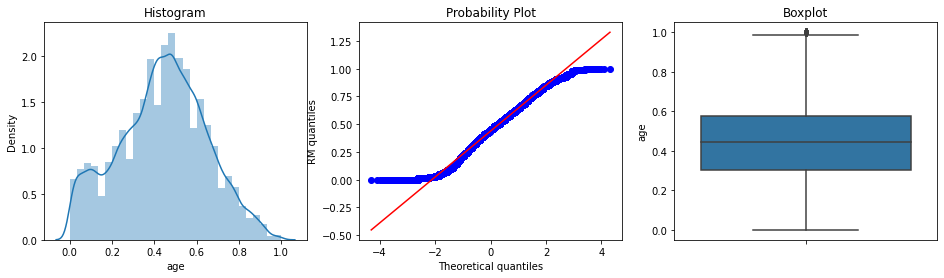

In [538]:
diagnostic_plots(X_train, 'age')

C:\Users\congr\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


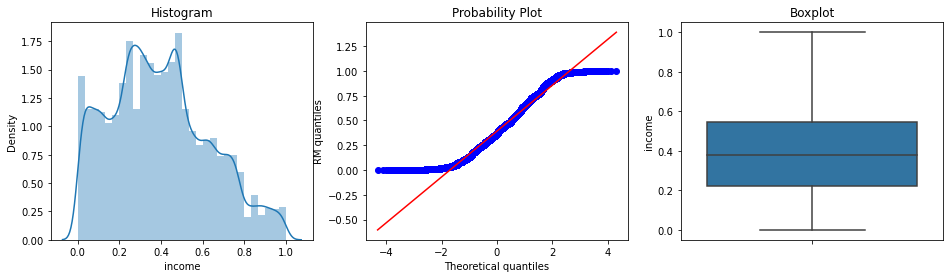

In [539]:
diagnostic_plots(X_train, 'income')

C:\Users\congr\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


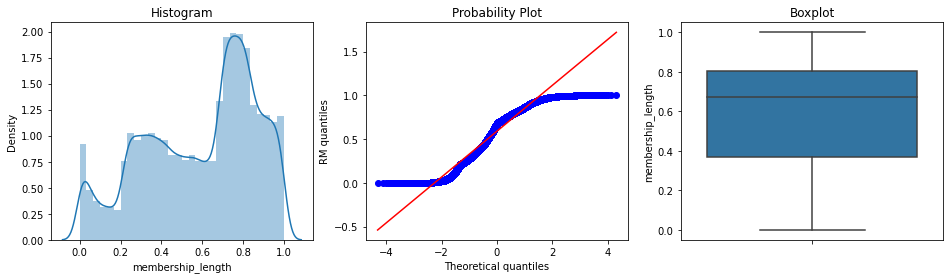

In [540]:
diagnostic_plots(X_train, 'membership_length')

C:\Users\congr\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


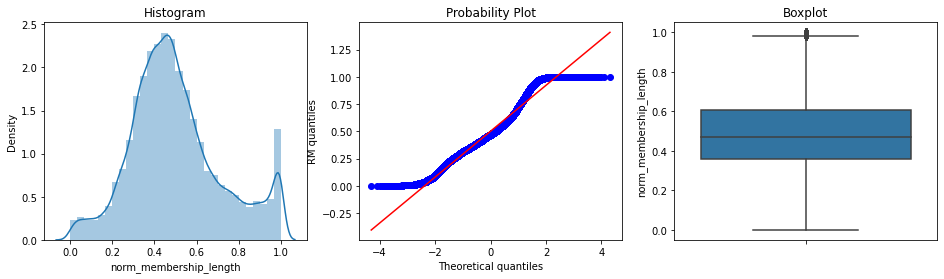

In [541]:
diagnostic_plots(X_train, 'norm_membership_length')

C:\Users\congr\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


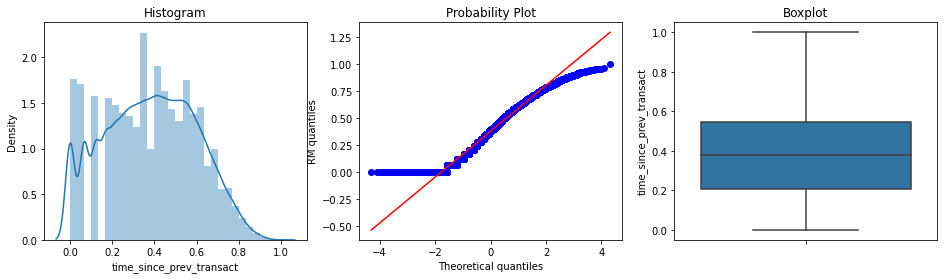

In [542]:
diagnostic_plots(X_train, 'time_since_prev_transact')

C:\Users\congr\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


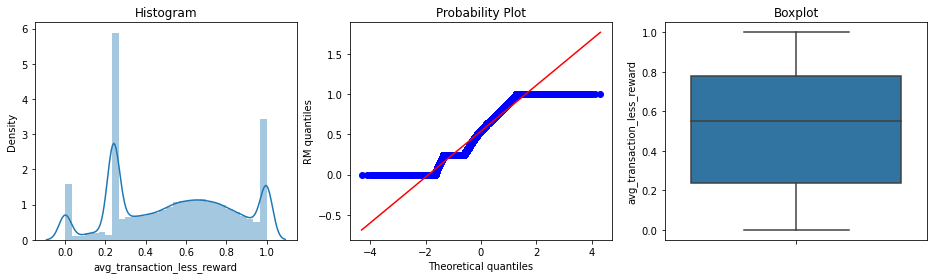

In [543]:
diagnostic_plots(pd.DataFrame(y_train, columns=['avg_transaction_less_reward']), 'avg_transaction_less_reward')

C:\Users\congr\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


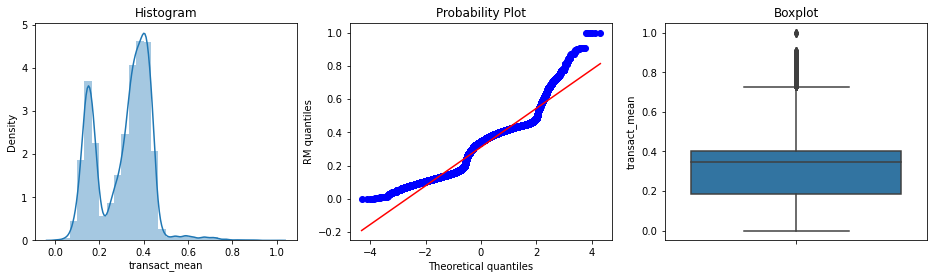

In [544]:
diagnostic_plots(X_train, 'transact_mean')

C:\Users\congr\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


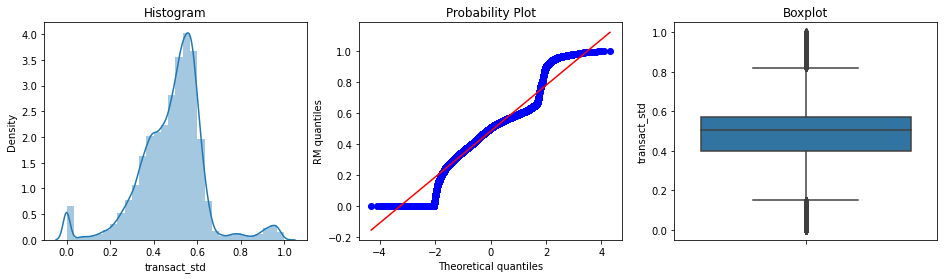

In [545]:
diagnostic_plots(X_train, 'transact_std')

C:\Users\congr\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


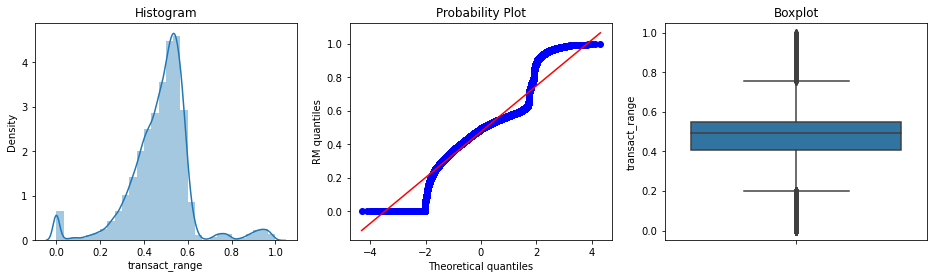

In [546]:
diagnostic_plots(X_train, 'transact_range')

Let us view the correlations between predictor variables and the predicted variable.

In [547]:
pd.concat(
    [y_train.reset_index(drop=True), X_train], 
    axis=1
).corr()['avg_transaction_less_reward'].to_dict()

{'avg_transaction_less_reward': 1.0,
 'age': 0.10363851608576935,
 'income': 0.25687163016431896,
 'membership_length': -0.22954222284528944,
 'norm_membership_length': -0.17230677770879121,
 'time_since_prev_transact': 0.0704334967604187,
 'view_rate': 0.1349111416138261,
 'complete_rate': 0.5593640773025692,
 'transact_mean': 0.43695357524116774,
 'transact_std': 0.4188081164896753,
 'transact_range': 0.431200425027761,
 'offer_id_ae264e3637204a6fb9bb56bc8210ddfd': -0.07121723939270207,
 'offer_id_no_offer': -0.03715884917972214,
 'offer_id_9b98b8c7a33c4b65b9aebfe6a799e6d9': 0.03654965670274665,
 'offer_id_2906b810c7d4411798c6938adc9daaa5': 0.07875284289992453,
 'offer_id_3f207df678b143eea3cee63160fa8bed': 0.00029182200901474887,
 'offer_id_5a8bc65990b245e5a138643cd4eb9837': -0.021293166848830977,
 'offer_id_f19421c1d4aa40978ebb69ca19b0e20d': -0.009760489368471612,
 'offer_id_2298d6c36e964ae4a3e7e9706d1fb8c2': 0.06517705716336167,
 'offer_id_fafdcd668e3743c1bb461111dcafc2a4': 0.09657

# Feature Selection
Due to the large number of polynomial features generated, we would like to trim the number of features down to around <u>50</u>.

We employ a model-based feature selection method. The basic intended model is first fitted using all features. Then from the fitted model, feature importances are inferred, and we pick the top <u>50</u> most important features.

Feature selection is performed for the benchmark model and the machine learning model separately.

NOTE: We manually ensure that the encoded counterparts of inherent categorical features (e.g. <i>gender</i>, <i>offer_id</i>) are <u>always included</u>.

In [1004]:
%%time
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression

ohe_dict = data_cleaning_pipe_X.named_steps['one_hot_encode'].encoder_dict_

CATEGORICAL_VARS = list(
    orig_col + '_' + col_val 
    for orig_col in ohe_dict.keys() 
    for col_val in ohe_dict[orig_col]
)

reg_feature_select = SelectFromModel(
    max_features=50,
    threshold=-np.inf,
    estimator=LinearRegression(),
)
reg_feature_select.fit(
    X_train, y_train
)

reg_selected_cols = list(
    X_train.columns[reg_feature_select.get_support()]
)
reg_selected_cols = list(
    set(selected_cols) | set(CATEGORICAL_VARS)
)
print('Selected columns:', reg_selected_cols)

X_train_reg, X_test_reg = X_train[reg_selected_cols], X_test[reg_selected_cols]
X_train_reg.shape, X_test_reg.shape

Selected columns: [0, 1, 'norm_membership_length', 'complete_rate', 2, 'age', 3, 4, 5, 6, 7, 8, 9, 260, 261, 'transact_mean', 263, 264, 272, 273, 'time_since_prev_transact', 274, 276, 'income', 277, 278, 279, 282, 283, 284, 'offer_id_3f207df678b143eea3cee63160fa8bed', 'transact_std', 'offer_id_ae264e3637204a6fb9bb56bc8210ddfd', 'membership_length', 'offer_id_9b98b8c7a33c4b65b9aebfe6a799e6d9', 262, 'offer_id_5a8bc65990b245e5a138643cd4eb9837', 50, 63, 198, 199, 'view_rate', 'offer_id_2298d6c36e964ae4a3e7e9706d1fb8c2', 'gender_M', 'offer_id_2906b810c7d4411798c6938adc9daaa5', 'offer_id_f19421c1d4aa40978ebb69ca19b0e20d', 'offer_id_no_offer', 'offer_id_fafdcd668e3743c1bb461111dcafc2a4', 224, 97, 225, 226, 227, 'offer_id_4d5c57ea9a6940dd891ad53e9dbe8da0', 'gender_F', 115, 116, 117, 118, 250, 251, 'transact_range']
Wall time: 31.5 ms


((83488, 62), (9277, 62))

NOTE: The model might take awhile to fit.

In [1006]:
%%time

from sklearn.ensemble import GradientBoostingRegressor

gbr_feature_select = SelectFromModel(
    max_features=50,
    threshold=-np.inf,
    estimator=GradientBoostingRegressor(
        criterion='mse',
        random_state=10,
        verbose=1,
    ),
)
gbr_feature_select.fit(
    X_train, y_train
)

gbr_selected_cols = list(
    X_train.columns[reg_feature_select.get_support()]
)
gbr_selected_cols = list(
    set(selected_cols) | set(CATEGORICAL_VARS)
)
print('Selected columns:', gbr_selected_cols)

X_train_gbr, X_test_gbr = X_train[gbr_selected_cols], X_test[gbr_selected_cols]
X_train_gbr.shape, X_test_gbr.shape

Selected columns: [0, 1, 'norm_membership_length', 'complete_rate', 2, 'age', 3, 4, 5, 6, 7, 8, 9, 260, 261, 'transact_mean', 263, 264, 272, 273, 'time_since_prev_transact', 274, 276, 'income', 277, 278, 279, 282, 283, 284, 'offer_id_3f207df678b143eea3cee63160fa8bed', 'transact_std', 'offer_id_ae264e3637204a6fb9bb56bc8210ddfd', 'membership_length', 'offer_id_9b98b8c7a33c4b65b9aebfe6a799e6d9', 262, 'offer_id_5a8bc65990b245e5a138643cd4eb9837', 50, 63, 198, 199, 'view_rate', 'offer_id_2298d6c36e964ae4a3e7e9706d1fb8c2', 'gender_M', 'offer_id_2906b810c7d4411798c6938adc9daaa5', 'offer_id_f19421c1d4aa40978ebb69ca19b0e20d', 'offer_id_no_offer', 'offer_id_fafdcd668e3743c1bb461111dcafc2a4', 224, 97, 225, 226, 227, 'offer_id_4d5c57ea9a6940dd891ad53e9dbe8da0', 'gender_F', 115, 116, 117, 118, 250, 251, 'transact_range']
Wall time: 40 ms


((83488, 62), (9277, 62))

# Benchmarking
Before training a sophisticated machine learning model, we will fit a simple Ordinary Least Square multi-linear regression model as benchmark for making predictions for our dependant variable.

In [992]:
%%time

#from joblib import dump, load
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

reg = linear_model.LinearRegression()
reg.fit(
    X_train_reg, 
    y_train,
)
#dump(reg, 'model/benchmark_model.joblib')

#reg = load('tuned_gbr_model.joblib')
print('Coefficients:')
pprint(reg.coef_.squeeze())

Coefficients:
array([-6.67934251e+07, -3.19288381e+11,  2.82412744e+11, -4.76051532e+10,
       -8.03772975e+09,  6.67934251e+07, -2.82412744e+11, -5.64894060e+10,
       -6.96252167e+10,  4.76051532e+10, -2.59229190e+10,  7.07384361e+10,
        2.89005970e+10,  5.36181390e-01,  1.74347782e+00,  2.59229190e+10,
        1.55738831e-01,  1.62271118e+00, -2.19573631e+01,  5.08157425e+01,
        5.64894060e+10, -2.88456497e+01,  1.62820053e+01,  3.19288381e+11,
       -1.78547344e+01, -1.99601116e+01,  2.02361450e+01,  2.90195923e+01,
       -6.06762238e+01,  2.92071533e+01, -4.87785339e-02, -7.07384361e+10,
       -1.11826897e-01,  8.03772975e+09, -2.05230713e-02, -3.42117310e+00,
       -2.63700485e-02, -2.11420655e+01,  3.91346741e+00, -1.65787029e+00,
        1.63424110e+00,  6.96252167e+10,  3.23505402e-02,  4.24194336e-03,
        4.93030548e-02, -4.84638214e-02, -5.86624146e-02,  6.34088516e-02,
       -8.72380352e+00,  4.12322998e-01,  9.91454315e+00,  6.42768478e+00,
       -6.9

For both train and test sets, plot predicted values against actual values as well as evaluate the <u>mean squared error (MSE)</u> and <u>R-squared score</u>. The better the fit, the closer points should be to the y = x line.

Train:
Mean squared error: 0.05
Coefficient of determination: 0.41
Test:
Mean squared error: 0.05
Coefficient of determination: 0.40


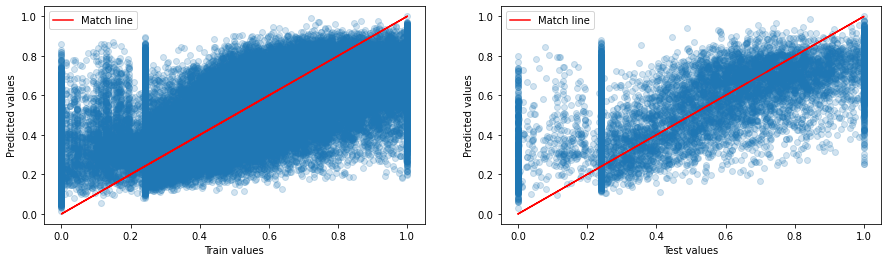

In [407]:
def predict_plot(train, train_pred, test, test_pred):
    plt.subplots(1, 2, figsize=(15, 4))
    
    plt.subplot(1, 2, 1)
    plt.scatter(train, train_pred, alpha=0.2)
    plt.xlabel('Train values')
    plt.ylabel('Predicted values')
    plt.plot(train, train, 'r', label='Match line')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.scatter(test, test_pred, alpha=0.2)
    plt.xlabel('Test values')
    plt.ylabel('Predicted values')
    plt.plot(test, test, 'r', label='Match line')
    plt.legend()

    print('Train:')
    print(f'Mean squared error: {mean_squared_error(train, train_pred):.2f}')
    print(f'Coefficient of determination: {r2_score(train, train_pred):.2f}')
    print('Test:')
    print(f'Mean squared error: {mean_squared_error(test, test_pred):.2f}')
    print(f'Coefficient of determination: {r2_score(test, test_pred):.2f}')
    
train_pred = reg.predict(X_train_reg)
test_pred = reg.predict(X_test_reg)

predict_plot(y_train, train_pred, y_test, test_pred)

To gauge how reliable our estimates can be, we calculate how much it overestimates and underestimates on average as well as how many points lie outside of a tolerance band of +/-\$5 on each side.

In [415]:
def print_measurements(y, pred, tol=0, y_transformer=None, y_scaler=None):  
    pred = pred.reshape(-1, 1)
    if y_scaler is not None:
        y = y_scaler.inverse_transform(y)
        pred = y_scaler.inverse_transform(pred)
    if y_transformer is not None:
        y = y_transformer.inverse_transform(y)
        pred = y_transformer.inverse_transform(pred)
    underestimates = (pred < y).any(axis=1)
    overestimates = (pred > y).any(axis=1)
    underestimates_tols = (pred < y - tol).any(axis=1)
    overestimates_tols = (pred > y + tol).any(axis=1)
    print(f'Mean underestimation of {(y - pred)[underestimates].mean():.2f}')
    print(f'Mean overestimation of {(pred - y)[overestimates].mean():.2f}')
    print(
        f'{underestimates_tols.sum()} ({underestimates_tols.sum() / len(y):.0%}) underestimates and {overestimates_tols.sum()} ({overestimates_tols.sum() / len(y):.0%}) overestimates outside tolerance of +/- {tol}'
    )
    
print('Train:')
print_measurements(y_train, train_pred, tol=5, y_transformer=y_transformer, y_scaler=y_scaler)
print('Test:')
print_measurements(y_test, test_pred, tol=5, y_transformer=y_transformer, y_scaler=y_scaler)

Train:
Mean underestimation of 6.28
Mean overestimation of 2.40
18976 (23%) underestimates and 5573 (7%) overestimates outside tolerance of +/- 5
Test:
Mean underestimation of 6.06
Mean overestimation of 2.74
1973 (21%) underestimates and 845 (9%) overestimates outside tolerance of +/- 5


We look at how the distributions of predicted values and that of actual values overlay.

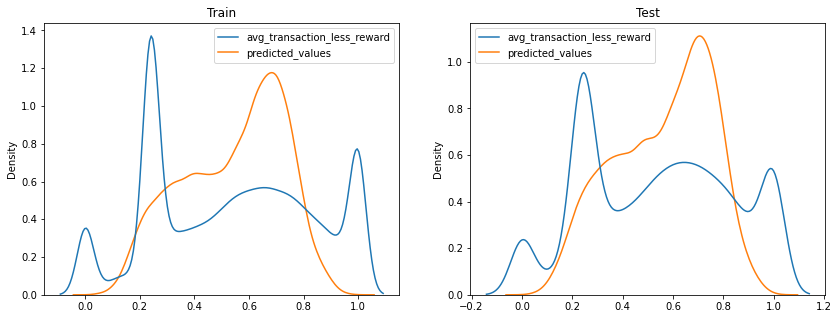

In [416]:
def hist_overlay(y, pred, ax=None):
    sns.kdeplot(
        data=pd.concat([
            y.reset_index(drop=True),
            pd.DataFrame(pred, columns=['predicted_values']),
        ], axis=1),
        ax=ax,
    )

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
ax1.set_title('Train')
hist_overlay(y_train, train_pred, ax=ax1)
ax2.set_title('Test')
hist_overlay(y_test, test_pred, ax=ax2)

As we have foreseen through the weak correlation of many main variables, the benchmark model is not very performant in explaining the variability in the predicted variable using the variability in the predictor variables (only 40%). It has a tendency to underestimate. Only 70% of predicted values are within a tolerance band of +/-\$5 from the actual values. The model has difficulties predicting near the end-tails of the predicted values.

# Model Training
Our choice of machine learning algorithm is the Gradient Boosting. It uses an ensemble of weak Decision Tree predictors to make averaged estimations, which are presumed to be more consistent and reliable in a sense that errors between weak predictors work to cancel each other out.

Here, we use the scikit-learn [GradientBoostingRegressor](https://scikit-learn.org/stable/modules/ensemble.html#gradient-boosting).

We start by training a basic GradientBoostingRegressor, using default parameters.

<b>WARNING</b>: Model might take awhile to train.

In [867]:
%%time

from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(
    random_state=10,
    verbose=1,
)

gbr.fit(X_train_gbr, y_train)

C:\Users\congr\miniconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


      Iter       Train Loss   Remaining Time 
         1           0.0805           59.91s
         2           0.0759           58.33s
         3           0.0721           57.28s
         4           0.0690           56.46s
         5           0.0663           55.83s
         6           0.0641           55.29s
         7           0.0622           54.64s
         8           0.0607           54.05s
         9           0.0592           53.90s
        10           0.0581           53.54s
        20           0.0525           47.54s
        30           0.0507           42.36s
        40           0.0499           36.92s
        50           0.0494           30.99s
        60           0.0490           24.89s
        70           0.0487           18.67s
        80           0.0485           12.51s
        90           0.0483            6.25s
       100           0.0481            0.00s


GradientBoostingRegressor(random_state=10, verbose=1)

Train:
Mean squared error: 0.05
Coefficient of determination: 0.44
Test:
Mean squared error: 0.05
Coefficient of determination: 0.43


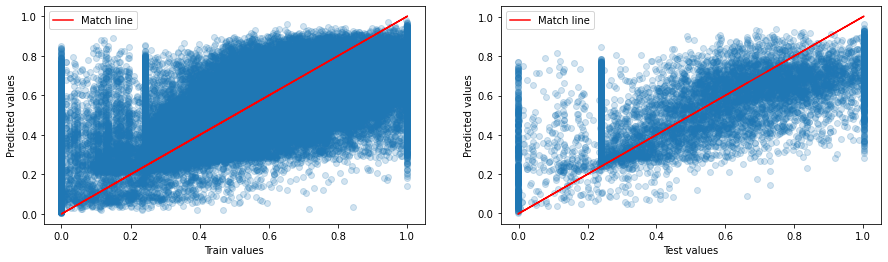

In [868]:
train_pred = gbr.predict(X_train_gbr)
test_pred = gbr.predict(X_test_gbr)

predict_plot(y_train, train_pred, y_test, test_pred)

In [869]:
print('Train:')
print_measurements(y_train, train_pred, tol=5, y_transformer=y_transformer, y_scaler=y_scaler)
print('Test:')
print_measurements(y_test, test_pred, tol=5, y_transformer=y_transformer, y_scaler=y_scaler)

Train:
Mean underestimation of 6.40
Mean overestimation of 2.22
19166 (23%) underestimates and 5190 (6%) overestimates outside tolerance of +/- 5
Test:
Mean underestimation of 6.45
Mean overestimation of 2.25
2147 (23%) underestimates and 577 (6%) overestimates outside tolerance of +/- 5


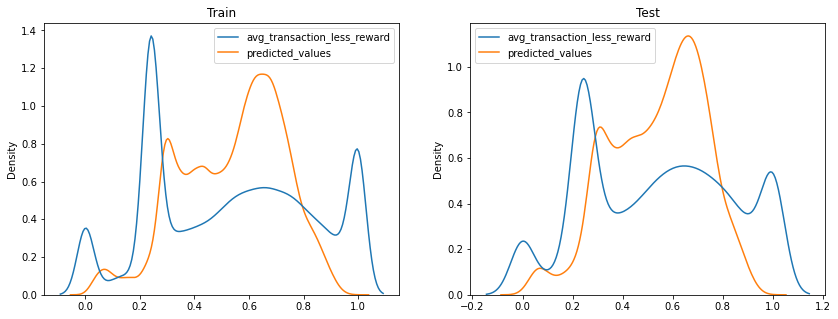

In [870]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
ax1.set_title('Train')
hist_overlay(y_train, train_pred, ax=ax1)
ax2.set_title('Test')
hist_overlay(y_test, test_pred, ax=ax2)

The explained variability in the predicted variable has increased to 43%. The same tolerance band captures 1% more predictions. There is an improvement in the prediction of the left end-tail of the predicted variable.

# Hyperparameter Tuning

There may still be room for improvements from the GradientBoostingRegressor using default parameters. In this section, we implement hyperparameter tuning using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). It uses exhaustive search to find the best set of hyperparameters within a given parameter space.

We tune the following hyperparameters of our model:
- <b>n_estimators</b>
The number of underlying weak predictors. It is robust to over-fitting so a larger number often results in better performance.
- <b>max_depth</b>
The maximum depth of each individual decision tree regressor. It also serves as a limiter for the number of leaf nodes and split nodes for each tree. A greater depth captures higher orders of variable interactions.
- <b>learning_rate</b>
The scale for each step length in the gradient descent procedure when fitting each tree. Smaller values tends to result in better test error, but could be over-sensitive to neighbourhood minimums. Larger values, on the other hand, converges faster but may not result in the lowest possible test error.

In [871]:
%%time

from sklearn.model_selection import GridSearchCV

parameters={
    'n_estimators': (75, 100, 125),
    'max_depth': (3, 5, 8),
    'learning_rate': (0.001, 0.01, 0.1),
}
tuner = GridSearchCV(
    GradientBoostingRegressor(
        loss='ls',
        random_state=10,
    ), 
    parameters, 
    scoring='r2',
    cv=3,
    n_jobs=-1,
    verbose=2,
)
tuner.fit(X_train_gbr, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


C:\Users\congr\miniconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Wall time: 25min 37s


GridSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=10),
             n_jobs=-1,
             param_grid={'learning_rate': (0.001, 0.01, 0.1),
                         'max_depth': (3, 5, 8),
                         'n_estimators': (75, 100, 125)},
             scoring='r2', verbose=2)

In [872]:
results = tuner.cv_results_
scorer = tuner.scoring

print(scorer, 'scores:')
sorted_idx = np.argsort(results[f'rank_test_score'])
for params, mean_score, std_score in zip(
    np.array(results['params'])[sorted_idx],
    results[f'mean_test_score'][sorted_idx],
    results[f'std_test_score'][sorted_idx],
):
    print('{:.3f} (+/-{:.3f}) for {}'.format(
        mean_score, std_score, params
    ))
print()

r2 scores:
0.446 (+/-0.003) for {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 125}
0.446 (+/-0.003) for {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
0.445 (+/-0.003) for {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 75}
0.437 (+/-0.003) for {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 75}
0.435 (+/-0.003) for {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 125}
0.434 (+/-0.003) for {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 100}
0.433 (+/-0.003) for {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
0.430 (+/-0.003) for {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 125}
0.429 (+/-0.002) for {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 75}
0.397 (+/-0.003) for {'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 125}
0.377 (+/-0.002) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 125}
0.371 (+/-0.003) for {'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 100}
0.350 (+/-0.002) 

As the tuning procedure can by very lengthy, the resulting best estimator fitted with the optimal hyperparameters is persisted.

In [875]:
#from joblib import dump, load

#dump(tuner.best_estimator_, 'model/tuned_gbr_model.joblib')
#tuned_gbr = load('tuned_gbr_model.joblib')

tuned_gbr = tuner.best_estimator_

Train:
Mean squared error: 0.04
Coefficient of determination: 0.49
Test:
Mean squared error: 0.05
Coefficient of determination: 0.45


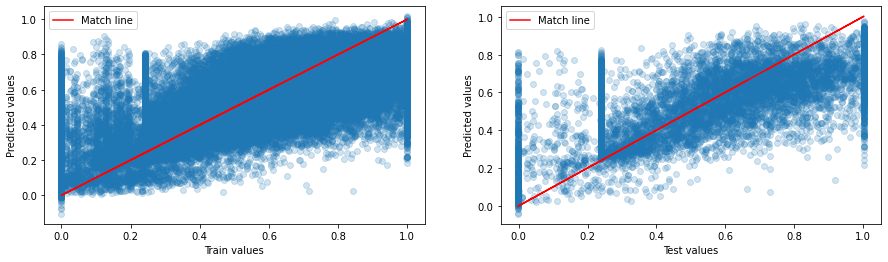

In [876]:
train_pred = tuned_gbr.predict(X_train_gbr)
test_pred = tuned_gbr.predict(X_test_gbr)

predict_plot(y_train, train_pred, y_test, test_pred)

In [877]:
print('Train:')
print_measurements(y_train, train_pred, tol=5, y_transformer=y_transformer, y_scaler=y_scaler)
print('Test:')
print_measurements(y_test, test_pred, tol=5, y_transformer=y_transformer, y_scaler=y_scaler)

Train:
Mean underestimation of 6.12
Mean overestimation of 2.16
18675 (22%) underestimates and 4883 (6%) overestimates outside tolerance of +/- 5
Test:
Mean underestimation of 6.28
Mean overestimation of 2.27
2128 (23%) underestimates and 601 (6%) overestimates outside tolerance of +/- 5


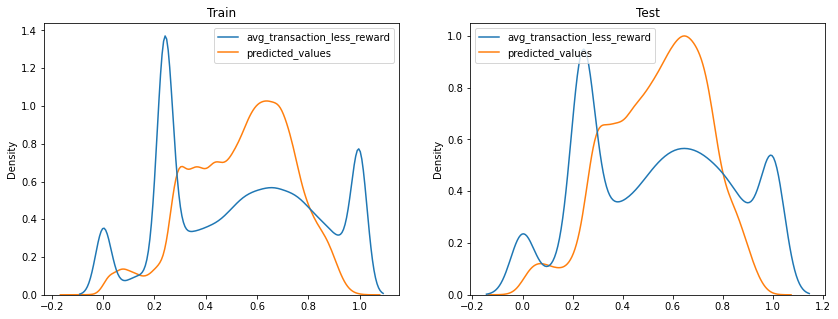

In [878]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
ax1.set_title('Train')
hist_overlay(y_train, train_pred, ax=ax1)
ax2.set_title('Test')
hist_overlay(y_test, test_pred, ax=ax2)

We observe a rather significant improvement in explained variability in the predicted variable in the train set, and a slight improvement in the test set.

# Evaluation

Using our tuned model, we seek to come up with a set of heuristics to determine the best offers to send out for each user. The input used consists of user profile data and his transactions aggregates up to a specified point in time. It can be implemented in real-time. We first use our model to suggest an offer for a randomly sampled user at the start of an influence period.

In [1025]:
sample = inputs_pre[inputs_pre['offer_id'] != 'no_offer'].sample(1)

# Unique id column to partition by later
sample['id'] = sample.index
sample

,offer_id,gender,age,income,membership_length,norm_membership_length,avg_transaction_less_reward,time_since_prev_transact,view_rate,complete_rate,transact_mean,transact_std,transact_range,id
64546,ae264e3637204a6fb9bb56bc8210ddfd,F,82,51000.0,1027,0.043288,46.32,0.75,1.0,0.6,16.05,6.600594,21.49,64546


To determine the best offer, we need to make a prediction of <i>avg_transaction_less_reward</i> for every offer available, including no offer made. A Cartesian product is made using the input row against all offers available.

In [1026]:
ALL_OFFERS = inputs_pre['offer_id'].unique()

crossed = pd.DataFrame(
    ALL_OFFERS,
    columns=['offer_id']
).merge(
    sample.drop(columns=['avg_transaction_less_reward', 'offer_id']), 
    how='cross'
)
crossed

,offer_id,gender,age,income,membership_length,norm_membership_length,time_since_prev_transact,view_rate,complete_rate,transact_mean,transact_std,transact_range,id
0,no_offer,F,82,51000.0,1027,0.043288,0.75,1.0,0.6,16.05,6.600594,21.49,64546
1,5a8bc65990b245e5a138643cd4eb9837,F,82,51000.0,1027,0.043288,0.75,1.0,0.6,16.05,6.600594,21.49,64546
2,3f207df678b143eea3cee63160fa8bed,F,82,51000.0,1027,0.043288,0.75,1.0,0.6,16.05,6.600594,21.49,64546
3,f19421c1d4aa40978ebb69ca19b0e20d,F,82,51000.0,1027,0.043288,0.75,1.0,0.6,16.05,6.600594,21.49,64546
4,4d5c57ea9a6940dd891ad53e9dbe8da0,F,82,51000.0,1027,0.043288,0.75,1.0,0.6,16.05,6.600594,21.49,64546
5,0b1e1539f2cc45b7b9fa7c272da2e1d7,F,82,51000.0,1027,0.043288,0.75,1.0,0.6,16.05,6.600594,21.49,64546
6,2906b810c7d4411798c6938adc9daaa5,F,82,51000.0,1027,0.043288,0.75,1.0,0.6,16.05,6.600594,21.49,64546
7,fafdcd668e3743c1bb461111dcafc2a4,F,82,51000.0,1027,0.043288,0.75,1.0,0.6,16.05,6.600594,21.49,64546
8,ae264e3637204a6fb9bb56bc8210ddfd,F,82,51000.0,1027,0.043288,0.75,1.0,0.6,16.05,6.600594,21.49,64546
9,2298d6c36e964ae4a3e7e9706d1fb8c2,F,82,51000.0,1027,0.043288,0.75,1.0,0.6,16.05,6.600594,21.49,64546


The data is passed through the data cleaning pipeline and trimmed down to the selected columns for the tuned estimator.

In [1027]:
cleaned = data_cleaning_pipe_X.transform(
    crossed.drop(columns='id')
)
cleaned = cleaned[gbr_selected_cols]
cleaned

,0,1,norm_membership_length,complete_rate,2,age,3,4,5,6,...,227,offer_id_4d5c57ea9a6940dd891ad53e9dbe8da0,gender_F,115,116,117,118,250,251,transact_range
0,0.771084,0.233333,0.258826,0.612187,0.379276,0.771084,0.258826,0.121043,0.58041,0.612187,...,0.086288,0,1,0.161276,0.155998,0.265763,0.257066,0.195526,0.206231,0.567867
1,0.771084,0.233333,0.258826,0.612187,0.379276,0.771084,0.258826,0.121043,0.58041,0.612187,...,0.086288,0,1,0.161276,0.155998,0.265763,0.257066,0.195526,0.206231,0.567867
2,0.771084,0.233333,0.258826,0.612187,0.379276,0.771084,0.258826,0.121043,0.58041,0.612187,...,0.086288,0,1,0.161276,0.155998,0.265763,0.257066,0.195526,0.206231,0.567867
3,0.771084,0.233333,0.258826,0.612187,0.379276,0.771084,0.258826,0.121043,0.58041,0.612187,...,0.086288,0,1,0.161276,0.155998,0.265763,0.257066,0.195526,0.206231,0.567867
4,0.771084,0.233333,0.258826,0.612187,0.379276,0.771084,0.258826,0.121043,0.58041,0.612187,...,0.086288,1,1,0.161276,0.155998,0.265763,0.257066,0.195526,0.206231,0.567867
5,0.771084,0.233333,0.258826,0.612187,0.379276,0.771084,0.258826,0.121043,0.58041,0.612187,...,0.086288,0,1,0.161276,0.155998,0.265763,0.257066,0.195526,0.206231,0.567867
6,0.771084,0.233333,0.258826,0.612187,0.379276,0.771084,0.258826,0.121043,0.58041,0.612187,...,0.086288,0,1,0.161276,0.155998,0.265763,0.257066,0.195526,0.206231,0.567867
7,0.771084,0.233333,0.258826,0.612187,0.379276,0.771084,0.258826,0.121043,0.58041,0.612187,...,0.086288,0,1,0.161276,0.155998,0.265763,0.257066,0.195526,0.206231,0.567867
8,0.771084,0.233333,0.258826,0.612187,0.379276,0.771084,0.258826,0.121043,0.58041,0.612187,...,0.086288,0,1,0.161276,0.155998,0.265763,0.257066,0.195526,0.206231,0.567867
9,0.771084,0.233333,0.258826,0.612187,0.379276,0.771084,0.258826,0.121043,0.58041,0.612187,...,0.086288,0,1,0.161276,0.155998,0.265763,0.257066,0.195526,0.206231,0.567867


The model makes predictions for <i>avg_transaction_less_reward</i>. For every offer, the change in <i>avg_transaction_less_reward</i> from having no offer made is calculated.

In [1028]:
pred = tuned_gbr.predict(cleaned)
pred = y_scaler.inverse_transform(pred.reshape(-1, 1))
pred = y_transformer.inverse_transform(pred)
crossed = pd.concat([
    crossed, 
    pd.DataFrame(pred, columns=['best_pred'])
], axis=1)
for group, df in crossed.groupby('id'):
    crossed.loc[
        crossed['id'] == group, 
        'best_change'
    ] = (
        df['best_pred'] 
        - df.loc[df['offer_id'] == 'no_offer', 'best_pred'].iloc[0]
    )
crossed

,offer_id,gender,age,income,membership_length,norm_membership_length,time_since_prev_transact,view_rate,complete_rate,transact_mean,transact_std,transact_range,id,best_pred,best_change
0,no_offer,F,82,51000.0,1027,0.043288,0.75,1.0,0.6,16.05,6.600594,21.49,64546,3.565061,0.000000
1,5a8bc65990b245e5a138643cd4eb9837,F,82,51000.0,1027,0.043288,0.75,1.0,0.6,16.05,6.600594,21.49,64546,5.058214,1.493153
2,3f207df678b143eea3cee63160fa8bed,F,82,51000.0,1027,0.043288,0.75,1.0,0.6,16.05,6.600594,21.49,64546,5.636908,2.071847
3,f19421c1d4aa40978ebb69ca19b0e20d,F,82,51000.0,1027,0.043288,0.75,1.0,0.6,16.05,6.600594,21.49,64546,6.743315,3.178254
4,4d5c57ea9a6940dd891ad53e9dbe8da0,F,82,51000.0,1027,0.043288,0.75,1.0,0.6,16.05,6.600594,21.49,64546,4.905510,1.340449
5,0b1e1539f2cc45b7b9fa7c272da2e1d7,F,82,51000.0,1027,0.043288,0.75,1.0,0.6,16.05,6.600594,21.49,64546,6.526965,2.961904
6,2906b810c7d4411798c6938adc9daaa5,F,82,51000.0,1027,0.043288,0.75,1.0,0.6,16.05,6.600594,21.49,64546,7.078457,3.513396
7,fafdcd668e3743c1bb461111dcafc2a4,F,82,51000.0,1027,0.043288,0.75,1.0,0.6,16.05,6.600594,21.49,64546,11.941636,8.376575
8,ae264e3637204a6fb9bb56bc8210ddfd,F,82,51000.0,1027,0.043288,0.75,1.0,0.6,16.05,6.600594,21.49,64546,6.138271,2.573210
9,2298d6c36e964ae4a3e7e9706d1fb8c2,F,82,51000.0,1027,0.043288,0.75,1.0,0.6,16.05,6.600594,21.49,64546,10.528045,6.962984


The best offer (which could be no offer) is the one which has the greatest predicted increase in <i>avg_transaction_less_reward</i>.

In [1029]:
best = crossed.loc[
    crossed.groupby('id')['best_change'].rank(ascending=False) == 1,
    ['id', 'offer_id', 'best_pred', 'best_change']
].rename(columns={'offer_id': 'best_offer'})
best

,id,best_offer,best_pred,best_change
7,64546,fafdcd668e3743c1bb461111dcafc2a4,11.941636,8.376575


Pick out a random offer, its predicted <i>avg_transaction_less_reward</i> and predicted change in <i>avg_transaction_less_reward</i>.

In [1030]:
random = (
    crossed.groupby('id').sample(1)[
        ['id', 'offer_id', 'best_pred', 'best_change']
    ].rename(columns={
        'offer_id': 'random_offer',
        'best_pred': 'random_pred',
        'best_change': 'random_change',
    })
)
random

,id,random_offer,random_pred,random_change
4,64546,4d5c57ea9a6940dd891ad53e9dbe8da0,4.90551,1.340449


For each of the following offers, concatenate to the sample data the predicted <i>avg_transaction_less_reward</i>, and change in <i>avg_transaction_less_reward</i>:
- the actual offer sent
- a random offer
- the best offer according to the model

In [1031]:
for df in (best, random):
    sample = sample.merge(
        df,
        on='id',
        how='inner',
    )

sample = sample.merge(
    crossed[['id', 'offer_id', 'best_pred', 'best_change']].rename(
        columns={'best_pred': 'pred', 'best_change': 'change'}
    ),
    on=['id', 'offer_id'],
    how='inner',
).drop(columns='id')

sample[[
    'offer_id', 'pred', 'change',
    'best_offer', 'best_pred', 'best_change',
    'random_offer', 'random_pred', 'random_change',
]]

,offer_id,pred,change,best_offer,best_pred,best_change,random_offer,random_pred,random_change
0,ae264e3637204a6fb9bb56bc8210ddfd,6.138271,2.57321,fafdcd668e3743c1bb461111dcafc2a4,11.941636,8.376575,4d5c57ea9a6940dd891ad53e9dbe8da0,4.90551,1.340449


The above illustrated steps to generate an offer recommendation is wrapped into the function below and ran on all data points corresponding to the start of an influence period.

In [1033]:
def make_offers_and_predict(
    df, 
    data_cleaning_pipe, 
    selected_cols,
    estimator,
    scaler,
    transformer
):
    df['id'] = df.index
    crossed = pd.DataFrame(
        ALL_OFFERS, 
        columns=['offer_id']
    ).merge(
        df.drop(columns=[
            'offer_id',
            'avg_transaction_less_reward',
        ]), 
        how='cross',
    )
    cleaned = data_cleaning_pipe.transform(crossed.drop(columns='id'))
    cleaned = cleaned[selected_cols]
    pred = estimator.predict(cleaned)
    pred = scaler.inverse_transform(pred.reshape(-1, 1))
    pred = transformer.inverse_transform(pred)
    crossed = pd.concat([crossed, pd.DataFrame(pred, columns=['best_pred'])], axis=1)
    for group, group_df in crossed.groupby('id'):
        crossed.loc[
            crossed['id'] == group, 
            'best_change'
        ] = (
            group_df['best_pred'] 
            - group_df.loc[
                group_df['offer_id'] == 'no_offer', 
                'best_pred'
            ].iloc[0]
        )
    best = crossed.loc[
        crossed.groupby('id')['best_change'].rank(ascending=False) == 1, 
        ['id', 'offer_id', 'best_pred', 'best_change']
    ].rename(columns={'offer_id': 'best_offer'})
    random = (
        crossed.groupby('id').sample(1)[
            ['id', 'offer_id', 'best_pred', 'best_change']
        ].rename(columns={
            'offer_id': 'random_offer',
            'best_pred': 'random_pred',
            'best_change': 'random_change',
        })
    )
    for offer_df in (best, random):
        df = df.merge(
            offer_df,
            on='id',
            how='inner',
        )
    df = df.merge(
        crossed[['id', 'offer_id', 'best_pred', 'best_change']].rename(
            columns={'best_pred': 'pred', 'best_change': 'change'}
        ),
        on=['id', 'offer_id'],
        how='inner',
    ).drop(columns='id')
    return df

In [1035]:
%%time

evaluation_set = inputs_pre[inputs_pre['offer_id'] != 'no_offer']
evaluation_set = make_offers_and_predict(
    evaluation_set,
    data_cleaning_pipe_X,
    gbr_selected_cols,
    tuned_gbr,
    y_scaler,
    y_transformer
)
evaluation_set[[
    'offer_id', 'pred', 'change',
    'best_offer', 'best_pred', 'best_change',
    'random_offer', 'random_pred', 'random_change',
]]

<ipython-input-1033-6fb92852fd04>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['id'] = df.index


Wall time: 3min 31s


,offer_id,pred,change,best_offer,best_pred,best_change,random_offer,random_pred,random_change
0,5a8bc65990b245e5a138643cd4eb9837,6.387274,2.012861,fafdcd668e3743c1bb461111dcafc2a4,13.020329,8.645917,fafdcd668e3743c1bb461111dcafc2a4,13.020329,8.645917
1,3f207df678b143eea3cee63160fa8bed,6.642587,1.326447,fafdcd668e3743c1bb461111dcafc2a4,13.333023,8.016882,9b98b8c7a33c4b65b9aebfe6a799e6d9,8.168527,2.852386
2,3f207df678b143eea3cee63160fa8bed,0.457438,-0.354347,no_offer,0.811785,0.000000,2906b810c7d4411798c6938adc9daaa5,0.442296,-0.369489
3,f19421c1d4aa40978ebb69ca19b0e20d,-0.106834,-0.907220,no_offer,0.800386,0.000000,ae264e3637204a6fb9bb56bc8210ddfd,-0.022943,-0.823329
4,4d5c57ea9a6940dd891ad53e9dbe8da0,-0.405804,-1.398850,2906b810c7d4411798c6938adc9daaa5,1.247447,0.254400,no_offer,0.993046,0.000000
...,...,...,...,...,...,...,...,...,...
42572,5a8bc65990b245e5a138643cd4eb9837,2.787445,0.291913,fafdcd668e3743c1bb461111dcafc2a4,4.773459,2.277927,no_offer,2.495532,0.000000
42573,2298d6c36e964ae4a3e7e9706d1fb8c2,4.572076,1.236220,fafdcd668e3743c1bb461111dcafc2a4,5.582953,2.247096,ae264e3637204a6fb9bb56bc8210ddfd,1.895952,-1.439905
42574,fafdcd668e3743c1bb461111dcafc2a4,4.773459,2.277927,fafdcd668e3743c1bb461111dcafc2a4,4.773459,2.277927,2298d6c36e964ae4a3e7e9706d1fb8c2,4.100800,1.605268
42575,f19421c1d4aa40978ebb69ca19b0e20d,2.663500,0.167967,2906b810c7d4411798c6938adc9daaa5,4.755513,2.259981,f19421c1d4aa40978ebb69ca19b0e20d,2.663500,0.167967


Let us compare the predicted changes in <i>avg_transaction_less_reward</i> for when:
- the model-suggested optimal offer is made.
- a random offer is made.
- the actual offer that was made.

,change,random_change,best_change
count,42577.000000,42577.000000,42577.000000
mean,1.795946,1.491949,4.286205
std,2.886072,2.648243,3.634763
min,-7.204703,-6.930093,0.000000
25%,-0.346252,-0.220490,0.881534
50%,0.844794,0.411536,3.643736
75%,3.267408,2.649827,7.228889
max,19.323456,23.211087,23.211087


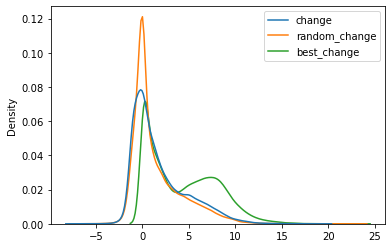

In [1036]:
sns.kdeplot(data=evaluation_set[['change', 'random_change', 'best_change']])

evaluation_set[['change', 'random_change', 'best_change']].describe()

The model predicts that making random offers fare worst, followed by the actual offers that were made, and then the model-suggested optimal offers. Making the optimal offer could, according to the model, boost <i>avg_transaction_less_reward</i> by \$2.50 per influence period.

In addition, the model could inform us how many and which offers made were redundant.

In [1054]:
evaluation_set.loc[
    evaluation_set['best_offer'] == 'no_offer',
    'offer_id'
].value_counts()

3f207df678b143eea3cee63160fa8bed    211
5a8bc65990b245e5a138643cd4eb9837    193
4d5c57ea9a6940dd891ad53e9dbe8da0    179
f19421c1d4aa40978ebb69ca19b0e20d    168
2298d6c36e964ae4a3e7e9706d1fb8c2    158
fafdcd668e3743c1bb461111dcafc2a4    142
9b98b8c7a33c4b65b9aebfe6a799e6d9    122
0b1e1539f2cc45b7b9fa7c272da2e1d7    111
ae264e3637204a6fb9bb56bc8210ddfd    107
2906b810c7d4411798c6938adc9daaa5    106
Name: offer_id, dtype: int64

In [1055]:
evaluation_set.loc[
    evaluation_set['best_offer'] == 'no_offer',
    ['change', 'best_change']
].describe()

,change,best_change
count,1497.000000,1497.0
mean,-0.912700,0.0
std,0.666230,0.0
min,-6.852243,0.0
25%,-1.297009,0.0
50%,-0.797252,0.0
75%,-0.410346,0.0
max,-0.002209,0.0
